In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
import re

In [3]:
train=pd.read_csv("C:\\Users\\Dell\\Desktop\\GDZ Elektrik Datathon\\new_train.csv")
test=pd.read_csv("C:\\Users\\Dell\\Desktop\\GDZ Elektrik Datathon\\new_test.csv")
submission=pd.read_csv("C:\\Users\\Dell\\Desktop\\GDZ Elektrik Datathon\\sample_submission.csv")

In [4]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data
    
train = encode(train, 'yil', 365)
train = encode(train, 'ay', 12)
train = encode(train, 'haftanin_gunu', 7)

test = encode(test, 'yil', 365)
test = encode(test, 'ay', 12)
test = encode(test, 'haftanin_gunu', 7)

In [5]:
silinecek_sutunlar=["yil","ay","haftanin_gunu","bildirimli_sum","tarih","mevsim","min_t_2m:C","max_t_2m:C",'mean_t_2m:C',
                    't_difference_2m:C','min_t_apparent:C','max_relative_humidity_2m:p','t_apparent_difference:C','max_global_rad:W',
                    'max_t_apparent:C','mean_t_apparent:C','tatil_mi']
train_df=train.drop(silinecek_sutunlar,axis=1)
test_df=test.drop(silinecek_sutunlar,axis=1)

In [6]:
train_df=pd.get_dummies(data=train_df, prefix="ilce", dtype="int")
train_df=train_df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
train_df.head()

,bildirimsiz_sum,max_wind_speed_10mms,max_prob_precip_1hp,yil_sin,yil_cos,ay_sin,ay_cos,haftanin_gunu_sin,haftanin_gunu_cos,ilce_izmiraliaga,...,ilce_manisakoprubasi,ilce_manisakula,ilce_manisasalihli,ilce_manisasarigol,ilce_manisasaruhanli,ilce_manisasehzadeler,ilce_manisaselendi,ilce_manisasoma,ilce_manisaturgutlu,ilce_manisayunusemre
0,5.0,6.4,1.0,-0.230306,-0.973118,0.5,0.866025,-0.433884,-0.900969,1,...,0,0,0,0,0,0,0,0,0,0
1,4.0,2.5,1.0,-0.230306,-0.973118,0.5,0.866025,-0.433884,-0.900969,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,6.2,5.9,-0.230306,-0.973118,0.5,0.866025,-0.433884,-0.900969,0,...,0,0,0,0,0,0,0,0,0,0
3,7.0,3.5,3.7,-0.230306,-0.973118,0.5,0.866025,-0.433884,-0.900969,0,...,0,0,0,0,0,0,0,0,0,0
4,8.0,7.2,12.8,-0.230306,-0.973118,0.5,0.866025,-0.433884,-0.900969,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_df=pd.get_dummies(data=test_df, prefix="ilce", dtype="int")
test_df=test_df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
test_df.head()

,max_wind_speed_10mms,max_prob_precip_1hp,yil_sin,yil_cos,ay_sin,ay_cos,haftanin_gunu_sin,haftanin_gunu_cos,ilce_izmiraliaga,ilce_izmirbalcova,...,ilce_manisakoprubasi,ilce_manisakula,ilce_manisasalihli,ilce_manisasarigol,ilce_manisasaruhanli,ilce_manisasehzadeler,ilce_manisaselendi,ilce_manisasoma,ilce_manisaturgutlu,ilce_manisayunusemre
0,7.0,1.0,-0.280231,-0.959933,0.866025,0.5,0.433884,-0.900969,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2.8,1.0,-0.280231,-0.959933,0.866025,0.5,0.433884,-0.900969,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.3,1.0,-0.280231,-0.959933,0.866025,0.5,0.433884,-0.900969,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.8,1.0,-0.280231,-0.959933,0.866025,0.5,0.433884,-0.900969,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.6,1.0,-0.280231,-0.959933,0.866025,0.5,0.433884,-0.900969,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_df.head()

,bildirimsiz_sum,max_wind_speed_10mms,max_prob_precip_1hp,yil_sin,yil_cos,ay_sin,ay_cos,haftanin_gunu_sin,haftanin_gunu_cos,ilce_izmiraliaga,...,ilce_manisakoprubasi,ilce_manisakula,ilce_manisasalihli,ilce_manisasarigol,ilce_manisasaruhanli,ilce_manisasehzadeler,ilce_manisaselendi,ilce_manisasoma,ilce_manisaturgutlu,ilce_manisayunusemre
0,5.0,6.4,1.0,-0.230306,-0.973118,0.5,0.866025,-0.433884,-0.900969,1,...,0,0,0,0,0,0,0,0,0,0
1,4.0,2.5,1.0,-0.230306,-0.973118,0.5,0.866025,-0.433884,-0.900969,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,6.2,5.9,-0.230306,-0.973118,0.5,0.866025,-0.433884,-0.900969,0,...,0,0,0,0,0,0,0,0,0,0
3,7.0,3.5,3.7,-0.230306,-0.973118,0.5,0.866025,-0.433884,-0.900969,0,...,0,0,0,0,0,0,0,0,0,0
4,8.0,7.2,12.8,-0.230306,-0.973118,0.5,0.866025,-0.433884,-0.900969,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y=train_df["bildirimsiz_sum"]
x=train_df.drop("bildirimsiz_sum",axis=1)

In [10]:
X_train=x[:int(len(x)*0.8)]
X_test=x[int(len(x)*0.8):]
y_train=y[:int(len(y)*0.8)]
y_test=y[int(len(y)*0.8):]
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(41322, 55) (10331, 55) (41322,) (10331,)


In [11]:
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
params={"max_depth":[3,5,8,"None",7],
            "learning_rate":[0.001,0.01,0.1,0.5],  
            "n_estimators":[40,50,60,70,80,90,100,150,200,500],
            "subsample":[0.6,0.8,0.9,1],
            "random_state":[14],
            "max_leaves": [0,5,10,20,40,50,70,100]}

from xgboost import XGBRegressor
xgbr=XGBRegressor()
xgbr_best_grid=GridSearchCV(xgbr,
                           params,
                           cv=3,
                           n_jobs=-1, 
                           verbose=True).fit(X_train, y_train)

Fitting 3 folds for each of 6400 candidates, totalling 19200 fits


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3840 fits failed out of a total of 19200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3840 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\anaconda3\Lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Dell\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\Dell

In [12]:
best_params=xgbr_best_grid.best_params_
best_params

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_leaves': 0,
 'n_estimators': 200,
 'random_state': 14,
 'subsample': 0.6}

In [13]:
from xgboost import XGBRegressor
xgbr=XGBRegressor(**xgbr_best_grid.best_params_)
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=0,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=14, ...)

In [14]:
cross_val_score(xgbr,
                X_train,
                y_train,
                scoring="neg_mean_squared_error",
                cv=5,
                n_jobs=-1)

array([-29.99716879, -21.77483833, -14.53931499, -12.42560764,
       -13.96822425])

In [15]:
y_pred = xgbr.predict(X_test)
print("MAE: ",mean_absolute_error(y_test,y_pred))

MAE:  2.975429499348947


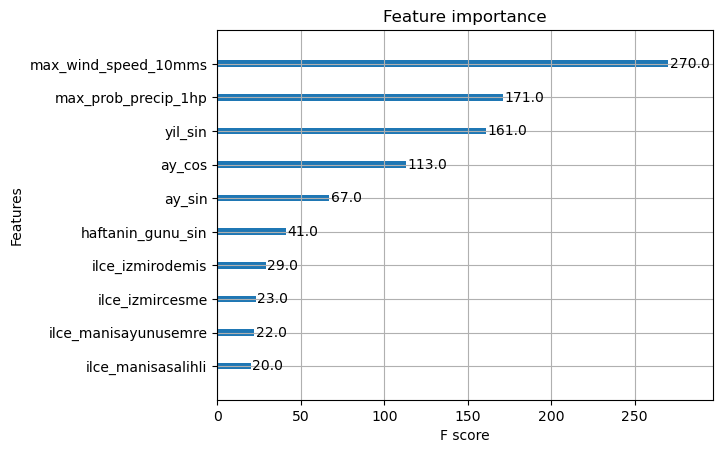

In [16]:
from xgboost import plot_importance
importance=plot_importance(xgbr,max_num_features=10)

In [17]:
test["bildirimsiz_sum"] = xgbr.predict(test_df)
test["bildirimsiz_sum"]=test["bildirimsiz_sum"].astype("int")
test["unique_id"]=[str(test["tarih"][i])+"-"+str(test["ilce"][i]) for i in range(0,len(test))]
predict=pd.DataFrame()
predict=test[["unique_id","bildirimsiz_sum"]]
predict["bildirimsiz_sum"]=test["bildirimsiz_sum"]
submission1=pd.merge(submission,predict,how="left",on="unique_id")
submission1.drop("bildirimsiz_sum_x",axis=1,inplace=True)
submission1.columns=["unique_id","bildirimsiz_sum"]
print(submission1.isnull().sum())
submission1.head()

unique_id          0
bildirimsiz_sum    0
dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_15676\2567085628.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict["bildirimsiz_sum"]=test["bildirimsiz_sum"]


,unique_id,bildirimsiz_sum
0,2024-02-01-izmir-aliaga,4
1,2024-02-01-izmir-bayindir,3
2,2024-02-01-izmir-bayrakli,3
3,2024-02-01-izmir-bergama,5
4,2024-02-01-izmir-bornova,8


In [18]:
submission1.to_csv("C:\\Users\\Dell\\Desktop\\GDZ Elektrik Datathon\\GDZ-Tahmin 12-XGBoost.csv",index=False)

In [24]:
import xgboost as xgb
from xgboost import XGBRegressor
early_stop = xgb.callback.EarlyStopping(rounds=5,
                                        metric_name='rmse',
                                        maximize=False,
                                        save_best=True)

xgbr=XGBRegressor(n_estimators=5000, random_state=14, learning_rate=0.1, subsample=0.6, max_dept=3, callbacks=[early_stop])
xgbr.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=1)

[20:16:07] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "max_dept" } are not used.

[0]	validation_0-rmse:7.42528
[1]	validation_0-rmse:7.17586
[2]	validation_0-rmse:6.93482
[3]	validation_0-rmse:6.74992
[4]	validation_0-rmse:6.56185
[5]	validation_0-rmse:6.40495
[6]	validation_0-rmse:6.26512
[7]	validation_0-rmse:6.17251
[8]	validation_0-rmse:6.07638
[9]	validation_0-rmse:5.98957
[10]	validation_0-rmse:5.91063
[11]	validation_0-rmse:5.83404
[12]	validation_0-rmse:5.75824
[13]	validation_0-rmse:5.72140
[14]	validation_0-rmse:5.67358
[15]	validation_0-rmse:5.64105
[16]	validation_0-rmse:5.59443
[17]	validation_0-rmse:5.55760
[18]	validation_0-rmse:5.52311
[19]	validation_0-rmse:5.49518
[20]	validation_0-rmse:5.47342
[21]	validation_0-rmse:5.44736
[22]	validation_0-rmse:5.42183
[23]	validation_0-rmse:5.40475
[24]	validation_0-rmse:5.38506
[25]	validation_0-rmse:5.36661
[26]	validation_0-rmse:5.34504
[27]	validation_0-rmse:5.33481


XGBRegressor(base_score=None, booster=None,
             callbacks=[<xgboost.callback.EarlyStopping object at 0x0000014C4AE135D0>],
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_dept=3, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=5000, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [25]:
y_pred=xgbr.predict(X_test)
print("MAE: ",mean_absolute_error(y_test,y_pred))

MAE:  2.9632691463794334


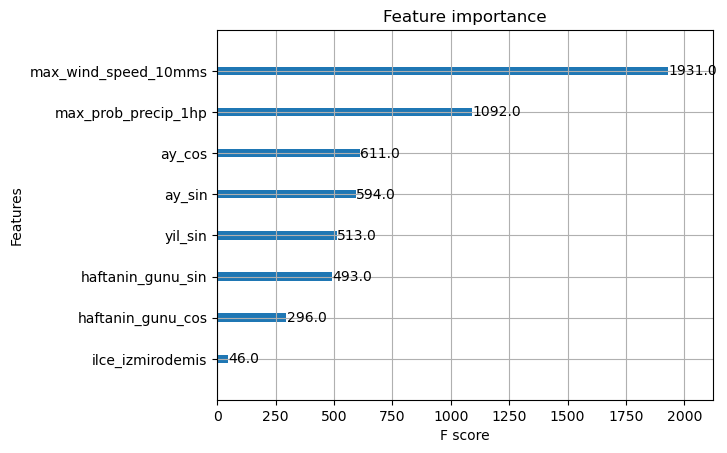

In [26]:
from xgboost import plot_importance
importance=plot_importance(xgbr,max_num_features=8)

In [27]:
test["bildirimsiz_sum"] = xgbr.predict(test_df)
test["bildirimsiz_sum"]=test["bildirimsiz_sum"].astype("int")
test["unique_id"]=[str(test["tarih"][i])+"-"+str(test["ilce"][i]) for i in range(0,len(test))]
predict=pd.DataFrame()
predict=test[["unique_id","bildirimsiz_sum"]]
predict["bildirimsiz_sum"]=test["bildirimsiz_sum"]
submission2=pd.merge(submission,predict,how="left",on="unique_id")
submission2.drop("bildirimsiz_sum_x",axis=1,inplace=True)
submission2.columns=["unique_id","bildirimsiz_sum"]
print(submission2.isnull().sum())
submission2.head()

unique_id          0
bildirimsiz_sum    0
dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_15676\2229840003.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict["bildirimsiz_sum"]=test["bildirimsiz_sum"]


,unique_id,bildirimsiz_sum
0,2024-02-01-izmir-aliaga,4
1,2024-02-01-izmir-bayindir,3
2,2024-02-01-izmir-bayrakli,3
3,2024-02-01-izmir-bergama,5
4,2024-02-01-izmir-bornova,8


In [28]:
submission2.to_csv("C:\\Users\\Dell\\Desktop\\GDZ Elektrik Datathon\\GDZ-Tahmin 13-XGBoost.csv",index=False)